<a href="https://colab.research.google.com/github/josdank/Fundamentos-de-IA/blob/main/regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
# Cargar los datos
gpu_metadata = pd.read_csv("gpu_metadata.csv")
gpu_price = pd.read_csv('gpu_price_history.csv')
print("Primeras filas de los datos:")
print(gpu_metadata.head())

print("\nPrimeras filas de los datos:")
print(gpu_price.head())

Primeras filas de los datos:
                     Name Wattage VRAM  3DMARK
0        GeForce GTX 1050     75W  2GB    1861
1     GeForce GTX 1050 Ti     75W  4GB    2356
2        GeForce GTX 1060    120W  6GB    4215
3        GeForce GTX 1650     75W  4GB    3552
4  GeForce GTX 1660 SUPER    125W  6GB    6078

Primeras filas de los datos:
       Date              Name  Retail Price  Used Price
0  01-01-24  GeForce GTX 1050             0           0
1  01-02-24  GeForce GTX 1050             0           0
2  01-03-23  GeForce GTX 1050           192          61
3  01-03-24  GeForce GTX 1050           254          52
4  01-04-23  GeForce GTX 1050           181          55


In [ ]:
# Preparar datos
x_wattage = gpu_metadata['Wattage'].str.replace('W', '', regex=False).astype(float).values.reshape(-1, 1)
# Replace 'W' with '' and convert to float before using
y_3dmark = gpu_metadata['3DMARK'].values

In [ ]:
# Crear y entrenar el modelo
wattage_model = LinearRegression()
wattage_model.fit(x_wattage, y_3dmark)

LinearRegression()

In [ ]:
# Coeficientes
a_wattage = wattage_model.coef_[0]
b_wattage = wattage_model.intercept_
print(f"Ecuación: 3DMARK = {a_wattage:.2f} * Wattage + {b_wattage:.2f}")

Ecuación: 3DMARK = 83.28 * Wattage + -4172.95


In [ ]:
# Predicciones
y_pred_wattage = wattage_model.predict(x_wattage)

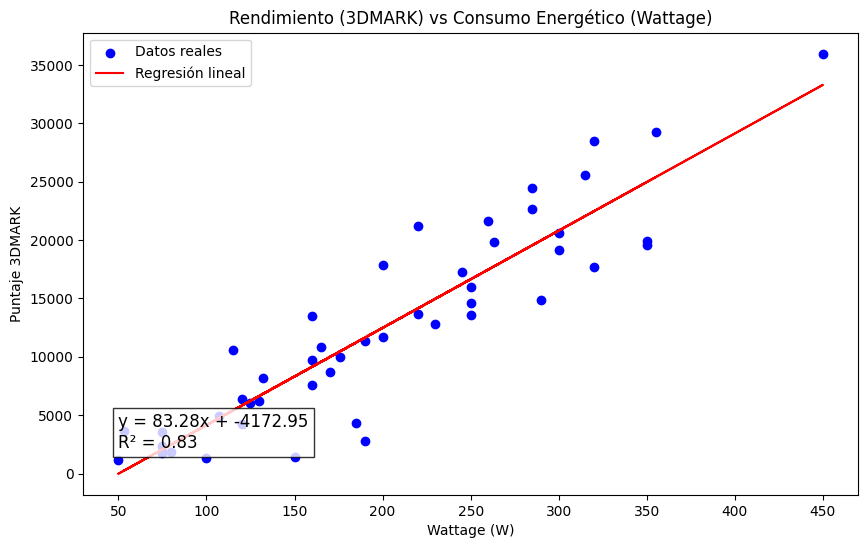

In [ ]:
# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(x_wattage, y_3dmark, color='blue', label='Datos reales')
plt.plot(x_wattage, y_pred_wattage, color='red', label='Regresión lineal')
plt.title('Rendimiento (3DMARK) vs Consumo Energético (Wattage)')
plt.xlabel('Wattage (W)')
plt.ylabel('Puntaje 3DMARK')
plt.legend()

# Mostrar ecuación en el gráfico
# Adjust the coordinates to be within the data range
# You might need to experiment with different values to find the best position
equation_text = f'y = {a_wattage:.2f}x + {b_wattage:.2f}\nR² = {r2_score(y_3dmark, y_pred_wattage):.2f}'
# Example: Placing the text in the lower left corner
plt.text(x_wattage.min(), y_3dmark.min() + 1000, equation_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.show()

In [ ]:
price_filtered = gpu_price[gpu_price['Retail Price'] > 0]
average_prices = price_filtered.groupby('Name')['Retail Price'].mean().reset_index()
average_prices.columns = ['Name', 'Average_Price']

# Convertir a DataFrame para mejor visualización
average_prices = df_filtered.groupby('Name')['Retail Price'].mean().sort_values(ascending=False)
average_prices = average_prices.reset_index()
average_prices.columns = ['GPU Model', 'Average Retail Price']

# Opcional: guardar los resultados en un archivo CSV
average_prices_df.head()

,index,Name,Average_Price
0,0,GeForce GTX 1050,224.888889
1,1,GeForce GTX 1050 Ti,190.500000
2,2,GeForce GTX 1060,290.937500
3,3,GeForce GTX 1650,147.423077
4,4,GeForce GTX 1660 SUPER,222.423077


In [ ]:
# 2. Cargar el dataset de metadatos
metadata_df = pd.read_csv('gpu_metadata.csv')

# 3. Combinar ambos datasets
merged_df = pd.merge(average_prices, metadata_df, on='Name', how='inner')

# 4. Preparar datos para regresión
X = merged_df['3DMARK'].values.reshape(-1, 1)  # Variable independiente (3DMark)
y = merged_df['Average_Price'].values          # Variable dependiente (Precio)

# 5. Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# 6. Predecir valores para la línea de regresión
y_pred = model.predict(X)

# 7. Calcular métricas
r2 = r2_score(y, y_pred)
equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'

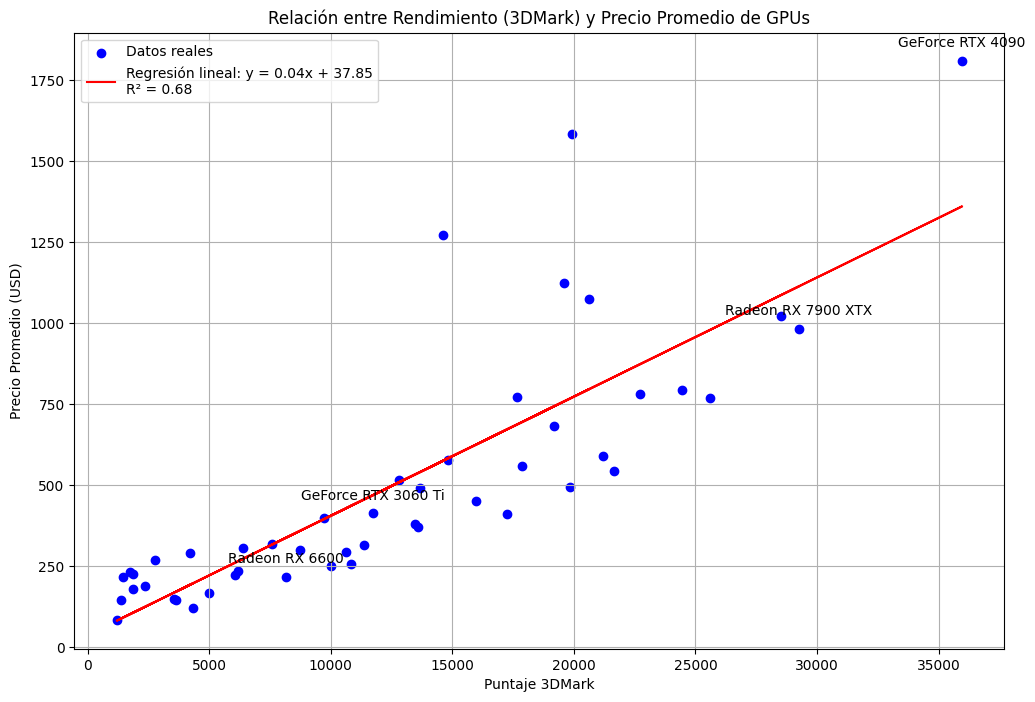

In [ ]:
# 8. Visualización
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', label=f'Regresión lineal: {equation}\nR² = {r2:.2f}')
plt.title('Relación entre Rendimiento (3DMark) y Precio Promedio de GPUs')
plt.xlabel('Puntaje 3DMark')
plt.ylabel('Precio Promedio (USD)')
plt.legend()
plt.grid(True)

# Anotar algunos modelos destacados
for i, row in merged_df.iterrows():
    if row['Name'] in ['GeForce RTX 4090', 'Radeon RX 7900 XTX', 'GeForce RTX 3060 Ti', 'Radeon RX 6600']:
        plt.annotate(row['Name'], (row['3DMARK'], row['Average_Price']),
                     textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

In [ ]:
# 9. Mostrar resultados estadísticos
print("\nResultados del análisis de regresión lineal:")
print(f"Ecuación: {equation}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")
print("\nResumen estadístico:")
print(merged_df[['Average_Price', '3DMARK']].describe())

# 10. Opcional: Guardar datos combinados
merged_df.to_csv('gpu_combined_analysis.csv', index=False)


Resultados del análisis de regresión lineal:
Ecuación: y = 0.04x + 37.85
Coeficiente de determinación (R²): 0.6771

Resumen estadístico:
       Average_Price        3DMARK
count      48.000000     48.000000
mean      500.007913  12561.916667
std       385.824544   8629.770759
min        82.666667   1195.000000
25%       229.251634   4816.250000
50%       376.001012  11561.500000
75%       614.210000  19288.250000
max      1810.560000  35966.000000
